# Analyze solomon files

In [40]:
import matplotlib.pyplot as plt


def parse_problem_file(file_path):
    node_coords = {}
    demands = {}
    vehicle_capacity = None

    with open(file_path, 'r') as file:
        lines = file.readlines()
        section = None

        for line in lines:
            line = line.strip()
            
            # Detect sections
            if line.startswith("VEHICLE"):
                section = "VEHICLE"
            elif line.startswith("CUSTOMER"):
                section = "CUSTOMER"
            elif section == "VEHICLE" and line.startswith("CAPACITY"):
                vehicle_capacity = int(line.split()[-1])  # Extract capacity value
            elif section == "CUSTOMER":
                if line and not line.startswith("CUST NO.") and not line.startswith("CAPACITY"):
                    parts = line.split()
                    if len(parts) >= 5:
                        node_id = int(parts[0])
                        x = float(parts[1])
                        y = float(parts[2])
                        demand = int(parts[3])
                        node_coords[node_id] = (x, y)
                        demands[node_id] = demand

    return node_coords, demands, vehicle_capacity

def parse_solution_file(file_path):
    routes = []
    cost = None

    with open(file_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            line = line.strip()
            if line.startswith("Route"):
                route = list(map(int, line.split(":")[1].strip().split()))
                routes.append(route)
            elif line.startswith("Cost"):
                cost = float(line.split()[1])

    return routes, cost

def plot_solution(node_coords, routes, cost, omit_depot_connections=False, hide_annotations=False,  output_path="solution_plot.png"):
    plt.figure(figsize=(12, 8))

    for route_idx, route in enumerate(routes, start=1):
        x_coords = [node_coords[node][0] for node in route]
        y_coords = [node_coords[node][1] for node in route]
        
        marker = '' if hide_annotations else 'o'

        if omit_depot_connections:
            # Plot the route without connecting to the depot
            plt.plot(x_coords, y_coords, marker=marker, label=f"Route {route_idx}")
        else:
            # Add depot at the start and end of the route
            depot_coords = node_coords[0]  # Assuming depot is always node 0
            x_coords = [depot_coords[0]] + x_coords + [depot_coords[0]]
            y_coords = [depot_coords[1]] + y_coords + [depot_coords[1]]

            # Plot the route with depot connections
            plt.plot(x_coords, y_coords,  marker=marker,label=f"Route {route_idx}")

        # Annotate nodes
        if not hide_annotations:
            for i, node in enumerate(route):
                plt.text(node_coords[node][0], node_coords[node][1], str(node), fontsize=8)

    # Plot depot separately
    depot_coords = node_coords[0]  # Assuming depot is always node 0
    plt.scatter(*depot_coords, color='red', s=100, label="Depot")
    

    # Add labels and legend
    plt.title(f"VRP Solution Visualization (Cost: {cost})")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    
    #plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=10, fontsize=8)

    plt.grid(True)
    plt.savefig(output_path)
    plt.show()


## Optimal

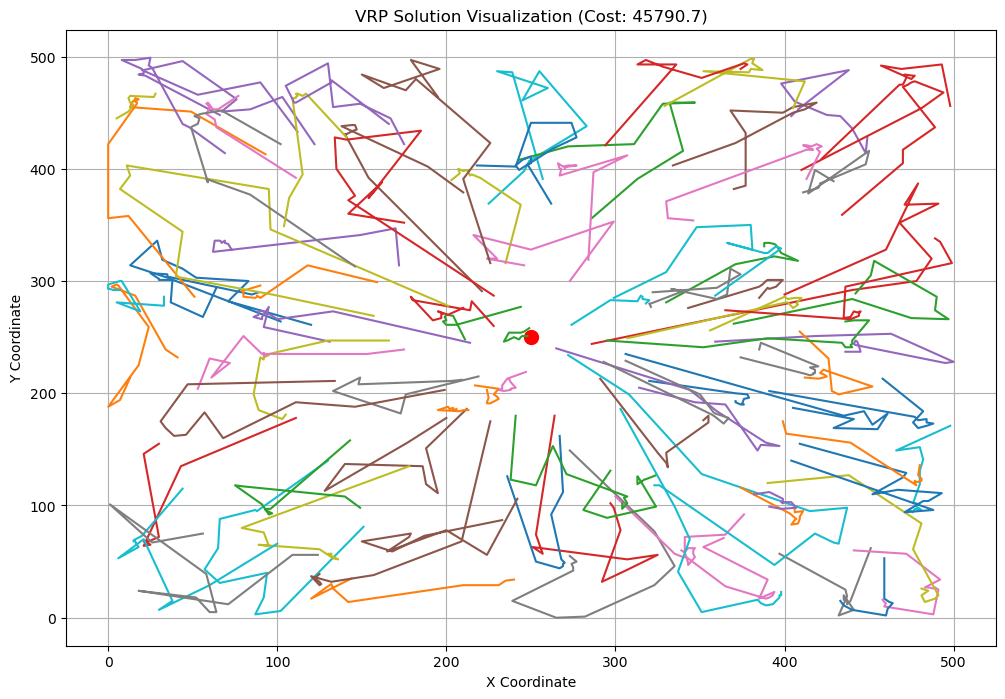

In [41]:
problem_file = "/home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/RC1_10_1.txt"
solution_file = "/home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/RC1_10_1.sol"

omit_depot_connections = True
hide_annotations = True

# Parse files
node_coords, _, _ = parse_problem_file(problem_file)
routes, cost = parse_solution_file(solution_file)

# Plot solution
plot_solution(node_coords, routes, cost, omit_depot_connections, hide_annotations)

## Experimental


```shell
target/release/vrp-cli solve solomon /home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/RC1_10_1.txt -o /home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/RC1_10_1_test.sol --log --max-time=300      
```

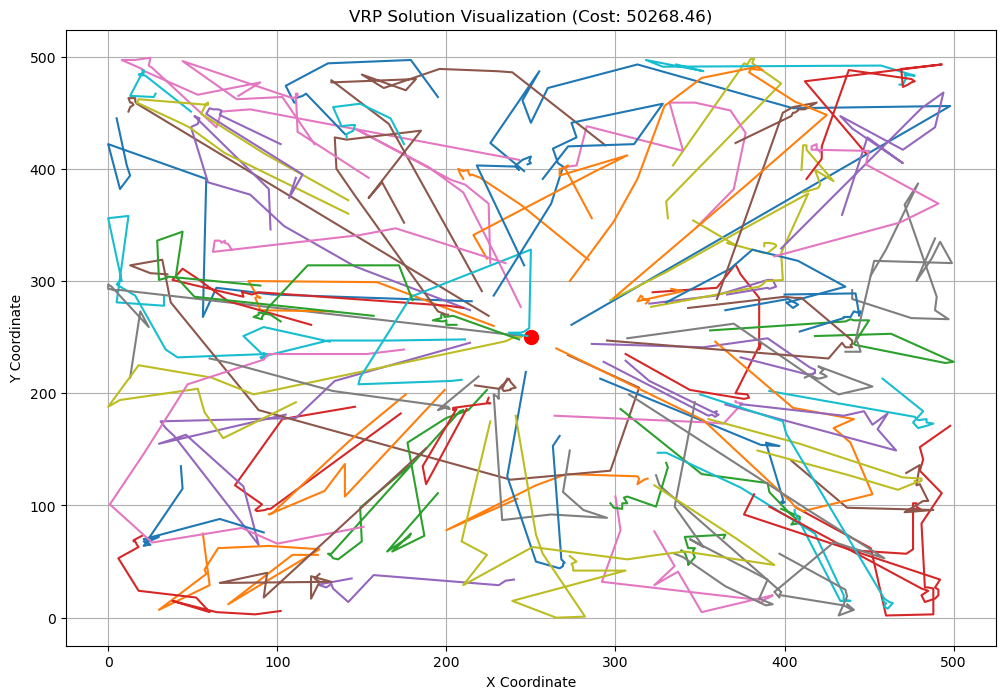

In [42]:
problem_file = "/home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/RC1_10_1.txt"
solution_file = "/home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/RC1_10_1_test.sol"

# Parse files
node_coords, _, _ = parse_problem_file(problem_file)
routes, cost = parse_solution_file(solution_file)

# Plot solution
plot_solution(node_coords, routes, cost, omit_depot_connections, hide_annotations)